Seaborn example & "Polishing" of plots
=====

In [1]:
# Import seaborn
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Apply the default theme
sns.set_theme()

In [2]:
penguins = sns.load_dataset("penguins")

In [3]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


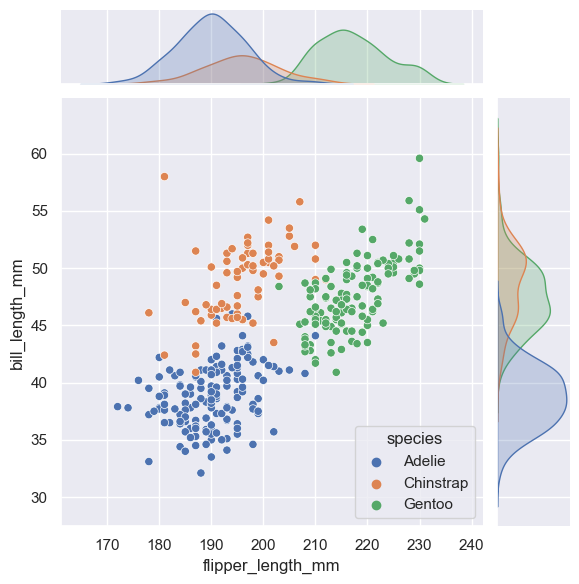

In [5]:
sns.jointplot(
    data=penguins,
    x="flipper_length_mm",
    y="bill_length_mm",
    hue="species"
)

plt.show()

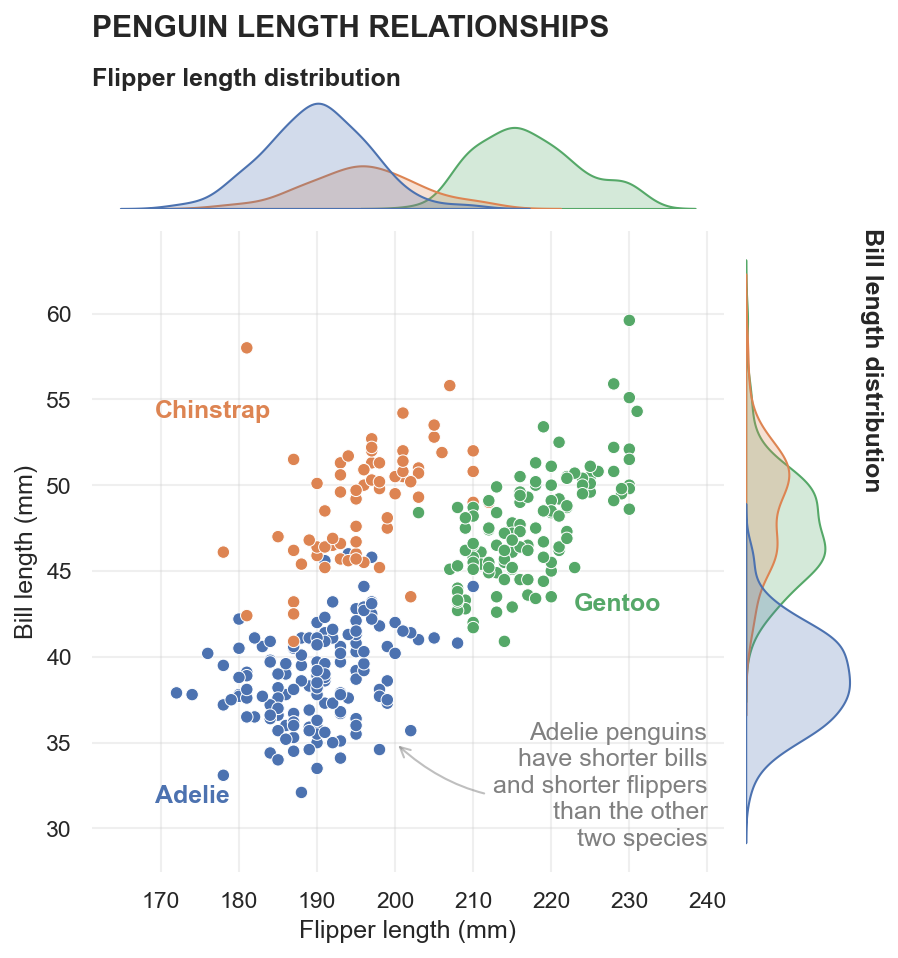

In [10]:
# settin the style
sns.set_style("whitegrid")

# setting the colors to plot the species
my_colors = sns.color_palette()

# "list" of species
my_species = penguins.species.unique()

# assigning colors to species
my_palette = dict(zip(my_species, my_colors))


alpha = 1

# Plotting the data

axs = sns.jointplot(
    data=penguins,
    x="flipper_length_mm",
    y="bill_length_mm",
    hue="species",
    palette = my_palette,
    alpha = alpha,
)

# Polishing the plot

# axis labels
axs.set_axis_labels("Flipper length (mm)", "Bill length (mm)")

# figure title
axs.figure.suptitle("Penguin length relationships".upper(),
    fontsize="larger", y=1.5, x = 0,
    ha = 'left', va = "bottom", transform = axs.ax_marg_x.transAxes, fontweight = 'bold')

# titles for the marginal plots
axs.ax_marg_x.set_title("Flipper length distribution", loc = 'left', fontweight = 'bold')
axs.ax_marg_y.set_title("Bill length distribution", fontweight = 'bold', rotation = 270, ha = 'left', va = "top", y = 0.985, x = 1.05)

# labels in the joint plot
axs.ax_joint.text(0.1,0.1, "Adelie", ha = 'left', va = "bottom", transform = axs.ax_joint.transAxes, fontweight = 'bold', color = my_palette['Adelie'])
axs.ax_joint.text(0.9,0.4, "Gentoo", ha = 'right', va = "bottom", transform = axs.ax_joint.transAxes, fontweight = 'bold', color = my_palette['Gentoo'])
axs.ax_joint.text(0.1,0.7, "Chinstrap", ha = 'left', va = "bottom", transform = axs.ax_joint.transAxes, fontweight = 'bold', color = my_palette['Chinstrap'])

# hide the original legend
axs.ax_joint.legend().set_visible(False)

# annotation
axs.ax_joint.annotate(
    # text
    "Adelie penguins\nhave shorter bills\nand shorter flippers\nthan the other\ntwo species",
    # position
    xy = (200,35), xytext = (240,29),
    ha = "right", color = "grey",
    # arrow
    arrowprops = dict(
        arrowstyle = '->', color = 'grey', lw = 1, alpha = 0.5,
        connectionstyle="arc3,rad=-0.3"), xycoords = axs.ax_joint.transData
)

# adjusting the grid
axs.ax_joint.grid(alpha = 0.3)
axs.ax_marg_x.grid(alpha = 0)
axs.ax_marg_y.grid(alpha = 0)

# removing the spines
sns.despine(top=True, right=True, bottom=True, left=True)

# increasing the resolution
axs.fig.set_dpi(150)

plt.show()
